In [1]:
#shapefiles
!ls -lh data/*/*.shp

-rwxr-xr-x@ 1 evaward  staff   7.2M Nov 20  2014 data/counties/COUNTIESSURVEY_ARC.shp
-rwxr-xr-x@ 1 evaward  staff   7.3M Nov 20  2014 data/counties/COUNTIESSURVEY_POLYM.shp
-rwxr-xr-x@ 1 evaward  staff   675K May 20  2003 data/counties/COUNTIES_ARC.shp
-rwxr-xr-x@ 1 evaward  staff   771K May 20  2003 data/counties/COUNTIES_POLY.shp
-rwxr-xr-x@ 1 evaward  staff   751K Aug  9  2007 data/counties/COUNTIES_POLYM.shp
-rwxr-xr-x@ 1 evaward  staff   325K Jan 22  2011 data/counties/COUNTYNC_POLY.shp
-rwxr-xr-x@ 1 evaward  staff   102M Dec 15 12:17 data/parcels/L3_MISC_POLY.shp
-rwxr-xr-x@ 1 evaward  staff    82M Dec 15 12:18 data/parcels/L3_OTHLEG_POLY.shp
-rwxr-xr-x@ 1 evaward  staff   8.6M Dec 15 12:18 data/parcels/L3_PARCEL_FTP_LINKS.shp
-rwxr-xr-x@ 1 evaward  staff   1.1G Dec 15 14:41 data/parcels/L3_TAXPAR_POLY_ASSESS.shp
-rwxr-xr-x@ 1 evaward  staff   8.4M Dec 15 12:18 data/parcels/L3_TOWNFY.shp
-rwxr-xr-x@ 1 evaward  staff    69K Jan 23 12:29 data/schools/SCHOOLS_PT.shp


In [2]:
import geopandas as gpd

In [3]:
#schools
shp_schools = 'data/schools/SCHOOLS_PT.shp'

#counties
shp_counties = 'data/counties/COUNTIES_POLY.shp'

In [4]:
%time schools = gpd.read_file(shp_schools)

CPU times: user 497 ms, sys: 12.3 ms, total: 509 ms
Wall time: 508 ms


In [5]:
%time counties = gpd.read_file(shp_counties)

CPU times: user 222 ms, sys: 3.98 ms, total: 226 ms
Wall time: 225 ms


In [6]:
schools.head()

,ADDRESS,FAX,GRADES,NAME,PHONE,PRINCIPAL,SCHID,STATE,TOWN,TOWN_MAIL,TYPE,TYPE_DESC,TYPE_DESC2,ZIP,geometry
0,120 Fisher Avenue,617-566-2373,"05,06,07,08,09",Roxbury Preparatory Charter School,617-566-2361,Anna Hall,04840505,MA,BOSTON,Roxbury,CHA,Charter,None,02120,POINT (232543.25 897533.5885000005)
1,160 Joan Street,413-783-2555,"K,01,02,03,04,05,06,07,08,09,10,11,12",Sabis International Charter School,413-783-2600,Karen Reuter,04410505,MA,SPRINGFIELD,Springfield,CHA,Charter,None,01129,POINT (118655.9209999964 875474.0989000015)
2,45 Congress Street,978-744-7246,"06,07,08,09,10,11,12",Salem Academy Charter School,978-744-2105,Stephanie Callahan,04850485,MA,SALEM,Salem,CHA,Charter,None,01970,POINT (250203.3103 918751.5731999986)
3,51 Gage Street,508-713-0956,"K,01,02,03,04,05,06,07,08",Seven Hills Charter School,508-799-7500,Michael Barth,04860105,MA,WORCESTER,Worcester,CHA,Charter,None,01605,POINT (176099.2556999996 890610.6473999992)
4,23 Leonard Street,617-474-7957,"06,07,08",Helen Y Davis Leadership Academy Charter Publi...,617-474-7950,Karmala Sherwood,04190305,MA,BOSTON,Boston,CHA,Charter,None,02122,POINT (236389.9209999964 894627.8632000014)


In [7]:
counties.head()

,AREA_ACRES,COUNTY,FIPS_ID,OBJECTID,SHAPE_AREA,SHAPE_LEN,geometry
0,316205.8,ESSEX,25009,1,1.279634e+09,480777.401542,"POLYGON ((242115.88 912141.38, 242104.67 91217..."
1,119.1,ESSEX,25009,2,4.818999e+05,3058.496339,"POLYGON ((254695.81 950209.75, 254577.41 95019..."
2,31.5,ESSEX,25009,3,1.273319e+05,1437.299536,"POLYGON ((255037.72 950436, 255118.27 950548.3..."
3,1.3,ESSEX,25009,4,5.383679e+03,318.295723,"POLYGON ((255527.28 949923.9399999999, 255467...."
4,7.1,ESSEX,25009,5,2.857241e+04,884.568271,"POLYGON ((256263.34 946235.4399999999, 256199...."


In [8]:
schools_for_join = schools[['geometry', 'NAME', 'SCHID', 'TOWN']]
counties_for_join = counties[['geometry', 'COUNTY']]

school_counties = gpd.sjoin(schools_for_join, counties_for_join, how="left", op='within')

In [9]:
school_counties.head()

,geometry,NAME,SCHID,TOWN,index_right,COUNTY
0,POINT (232543.25 897533.5885000005),Roxbury Preparatory Charter School,04840505,BOSTON,75,SUFFOLK
1,POINT (118655.9209999964 875474.0989000015),Sabis International Charter School,04410505,SPRINGFIELD,79,HAMPDEN
2,POINT (250203.3103 918751.5731999986),Salem Academy Charter School,04850485,SALEM,0,ESSEX
3,POINT (176099.2556999996 890610.6473999992),Seven Hills Charter School,04860105,WORCESTER,22,WORCESTER
4,POINT (236389.9209999964 894627.8632000014),Helen Y Davis Leadership Academy Charter Publi...,04190305,BOSTON,75,SUFFOLK


In [10]:
school_counties['COUNTY'].value_counts()

MIDDLESEX     540
WORCESTER     330
ESSEX         303
NORFOLK       265
SUFFOLK       230
HAMPDEN       200
BRISTOL       196
PLYMOUTH      168
BARNSTABLE     72
BERKSHIRE      71
HAMPSHIRE      71
FRANKLIN       51
DUKES           9
NANTUCKET       5
Name: COUNTY, dtype: int64

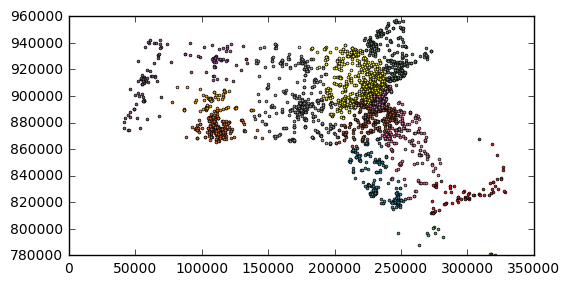

In [11]:
%matplotlib inline
school_counties.plot(column='COUNTY');